# Hands-On Machine Learning Project
## Topic 20: Credit Data
### Florian Korn, Vincent Bläske, Dennis Götz

## I. Get the Data
1. Get (download) the data.
2. Convert the data to a format you can easily manipulate (without changing the data itself), e.g. a Pandas
DataFrame.
3. Sample a test set, put it aside, and never look at it (no data snooping!)

In [111]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Column names
columns = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount', 
           'Savings account/bonds', 'Present employment since', 'Installment rate in percentage of disposable income', 
           'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property',
           'Age in years', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job',
           'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'Credit rating']

# Load original dataset DATA-Format
data = pd.read_csv('german.data', sep=' ', header=None)
data.columns = columns

# Load numerical dataset CSV-Format
data_num = pd.read_csv('german.data-numeric.csv', sep=';', header=None)

data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [188]:
# Create dictionary with real values to make the DataFrame readable
categorical_dict = {# Attribute 1: (qualitative) Status of existing checking account 
                    'A11' : '... < 0 DM',
                    'A12' : '0 <= ... < 200 DM',
                    'A13' : '... >= 200 DM / salary assignments for at least 1 year',
                    'A14' : 'no checking account',

                    # Attribute 3: (qualitative) Credit history 
                    'A30' : 'no credits taken/ all credits paid back duly',
                    'A31' : 'all credits at this bank paid back duly',
                    'A32' : 'existing credits paid back duly till now',
                    'A33' : 'delay in paying off in the past',
                    'A34' : 'critical account/ other credits existing (not at this bank)',
                    
                    # Attribute 4: (qualitative) Purpose 
                    'A40' : 'car (new)',
                    'A41' : 'car (used)',
                    'A42' : 'furniture/equipment',
                    'A43' : 'radio/television',
                    'A44' : 'domestic appliances',
                    'A45' : 'repairs',
                    'A46' : 'education',
                    'A47' : '(vacation - does not exist?)',
                    'A48' : 'retraining',
                    'A49' : 'business',
                    'A410' : 'others',

                    # Attibute 6: (qualitative) Savings account/bonds 
                    'A61' : '... < 100 DM',
                    'A62' : '100 <= ... < 500 DM',
                    'A63' : '500 <= ... < 1000 DM',
                    'A64' : '... >= 1000 DM',
                    'A65' : 'unknown/ no savings account',

                    # Attribute 7: (qualitative) Present employment since 
                    'A71' : 'unemployed',
                    'A72' : '... < 1 year',
                    'A73' : '1 <= ... < 4 years',
                    'A74' : '4 <= ... < 7 years',
                    'A75' : '... >= 7 years',

                    # Attribute 9: (qualitative) Personal status and sex 
                    'A91' : 'male : divorced/separated',
                    'A92' : 'female : divorced/separated/married',
                    'A93' : 'male : single',
                    'A94' : 'male : married/widowed',
                    'A95' : 'female : single',

                    # Attribute 10: (qualitative) Other debtors / guarantors 
                    'A101' : 'none',
                    'A102' : 'co-applicant',
                    'A103' : 'guarantor',

                    # Attribute 12: (qualitative) Property 
                    'A121' : 'real estate',
                    'A122' : 'if not A121 : building society savings agreement/ life insurance',
                    'A123' : 'if not A121/A122 : car or other, not in attribute 6',
                    'A124' : 'unknown / no property',

                    # Attribute 14: (qualitative) Other installment plans 
                    'A141' : 'bank',
                    'A142' : 'stores',
                    'A143' : 'none',

                    # Attribute 15: (qualitative) Housing 
                    'A151' : 'rent',
                    'A152' : 'own',
                    'A153' : 'for free',

                    # Attribute 17: (qualitative) Job
                    'A171' : 'unemployed/ unskilled - non-resident',
                    'A172' : 'unskilled - resident',
                    'A173' : 'skilled employee / official',
                    'A174' : 'management/ self-employed/ highly qualified employee/ officer',

                    # Attribute 19: (qualitative) Telephone
                    'A191' : 'none',
                    'A192' : 'yes, registered under the customers name',

                    # Attribute 20: (qualitative) foreign worker 
                    'A201' : 'yes',
                    'A202' : 'no',

                    # Target value: (qualitative) Credit rating
                    1 : 'good',
                    2 : 'bad'
                    }

In [189]:
# Qualitative columns
qualitative_cols = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 
                    'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property',
                    'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker', 'Credit rating']

# Numerical columns
numerical_cols = list(set(columns) - set(qualitative_cols))

# Copy the data to a new DataFrame
data_values = data.copy()

# Apply the dictionary to all qualitative columns of the new DataFrame to get the real values
data_values[qualitative_cols] = pd.DataFrame([data_values[column].apply(lambda key: categorical_dict[key]) for column in qualitative_cols]).T

# Save new DataFrame as XLSX
data_values.to_excel('data_values.xlsx')
data_values.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good


In [190]:
from sklearn import preprocessing
import pandas as pd
# Change features into dummy variables (one-hot-encoding)
#data_values_dummies = pd.get_dummies(data_values)

# Change features into label encoding
def label_encoder(series):
    label_encoder = preprocessing.LabelEncoder()
    encoder_val = np.unique(label_encoder.fit_transform(series))
    dict_index = series.unique()
    dict_label_encoder =  pd.Series(encoder_val, index = dict_index).to_dict()
    return series.map(dict_label_encoder), dict_label_encoder

data_values_dummies = pd.DataFrame()
all_dict = []
for i in range(len(data_values.columns)):
    if data_values.columns[i] in qualitative_cols:
        data_values_dummies[i], dict_temp = label_encoder(data_values.iloc[:,i])
        all_dict.append(dict_temp)
    else:
        data_values_dummies[i] = data_values.iloc[:,i]

data_values_dummies.columns = data_values.columns

# Separate features and target values
features = np.array(data_values_dummies.iloc[:, :20])
target_values = np.array(data_values_dummies.iloc[:, -1])

# Split the dataset into training- and testset (goog/bad ratio stays the same)
X_train, X_test, y_train, y_test = train_test_split(features, target_values, train_size=0.8, random_state=0, stratify=target_values)

print(f'{X_train.shape = }')
print(f'{X_test.shape = }\n')

# Check if training and test set have the same target-value-ratio
print('Ratio of target value good (0) in y_train: {:.2f} %'.format(100*np.sum(y_train == 0)/len(y_train)))
print('Ratio of target value good (0) in y_test: {:.2f} %'.format(100*np.sum(y_test == 0)/len(y_test)))

X_train.shape = (800, 20)
X_test.shape = (200, 20)

Ratio of target value good (0) in y_train: 70.00 %
Ratio of target value good (0) in y_test: 70.00 %


## II. Frame the Problem and Look at the Big Picture
1. Define the objective:<br>
a) Create a model that predicts the target value if a new sample has a 'good' or 'bad' credit rating.<br>
b) Most important features for credit rating? Reliability.<br>
c) Can a SMOTE algorithm improve the performance of the model (balanced dataset)?<br>
d) Can forward/backward selection improve the performance of the model?<br>

2. How should you frame this problem (supervised/unsupervised, regression/classification, etc)<br>
supervised, classification problem
3. How should performance be measured?<br>
Accuracy, AUC, ROC, F1-Score, GMean, Precision, Recall, R², MAE, MSE<br>
It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1). (FP worse than FN!!)<br>
4. What would be the minimum performance needed to reach the objective?<br>
At least 70% accuracy.
5. How would you solve the problem manually?<br>
Look how often a credit has a bad credit score if certain criterias are met. Depending on the characteristics of a new borrower we would assign good or bad credit risk.

## III. Explore the Data
1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Recommended: Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:<br>
◦ Name<br>
◦ Type (categorical, int/float, bounded/unbounded, text, etc.)<br>
◦ % of missing values<br>
◦ Noisiness and type of noise (e.g. stochastic, outliers, rounding errors, etc.)<br>
◦ Usefulness for the task<br>
◦ Type of distribution (Gaussian, uniform, logarithmic, etc.) [Feel free to omit this for the projectsfor this lecture]
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes and in particular between the "feature attributes" and the target attribute.
7. Study how you would solve the problem manually.
8. Identify promising transformations (feature engineering) you may want to apply.
9. Document what you have learned

In [191]:
# Check for NA-values
print('NA values: {}\n'.format(np.sum(np.sum(data.isna()))))

# Check rate of target values
print(data_values['Credit rating'].value_counts()) #slightly imbalanced; most of samples have a 'good' or '1' credit rating!

# Check data types
data_values_dummies.info()

NA values: 0

good    700
bad     300
Name: Credit rating, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Status of existing checking account                       1000 non-null   int64
 1   Duration in month                                         1000 non-null   int64
 2   Credit history                                            1000 non-null   int64
 3   Purpose                                                   1000 non-null   int64
 4   Credit amount                                             1000 non-null   int64
 5   Savings account/bonds                                     1000 non-null   int64
 6   Present employment since                                  1000 non-null   int64
 7   Installment rate in percentage of disposable income 

In [192]:
# Get some statistics from numerical values
data_values.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


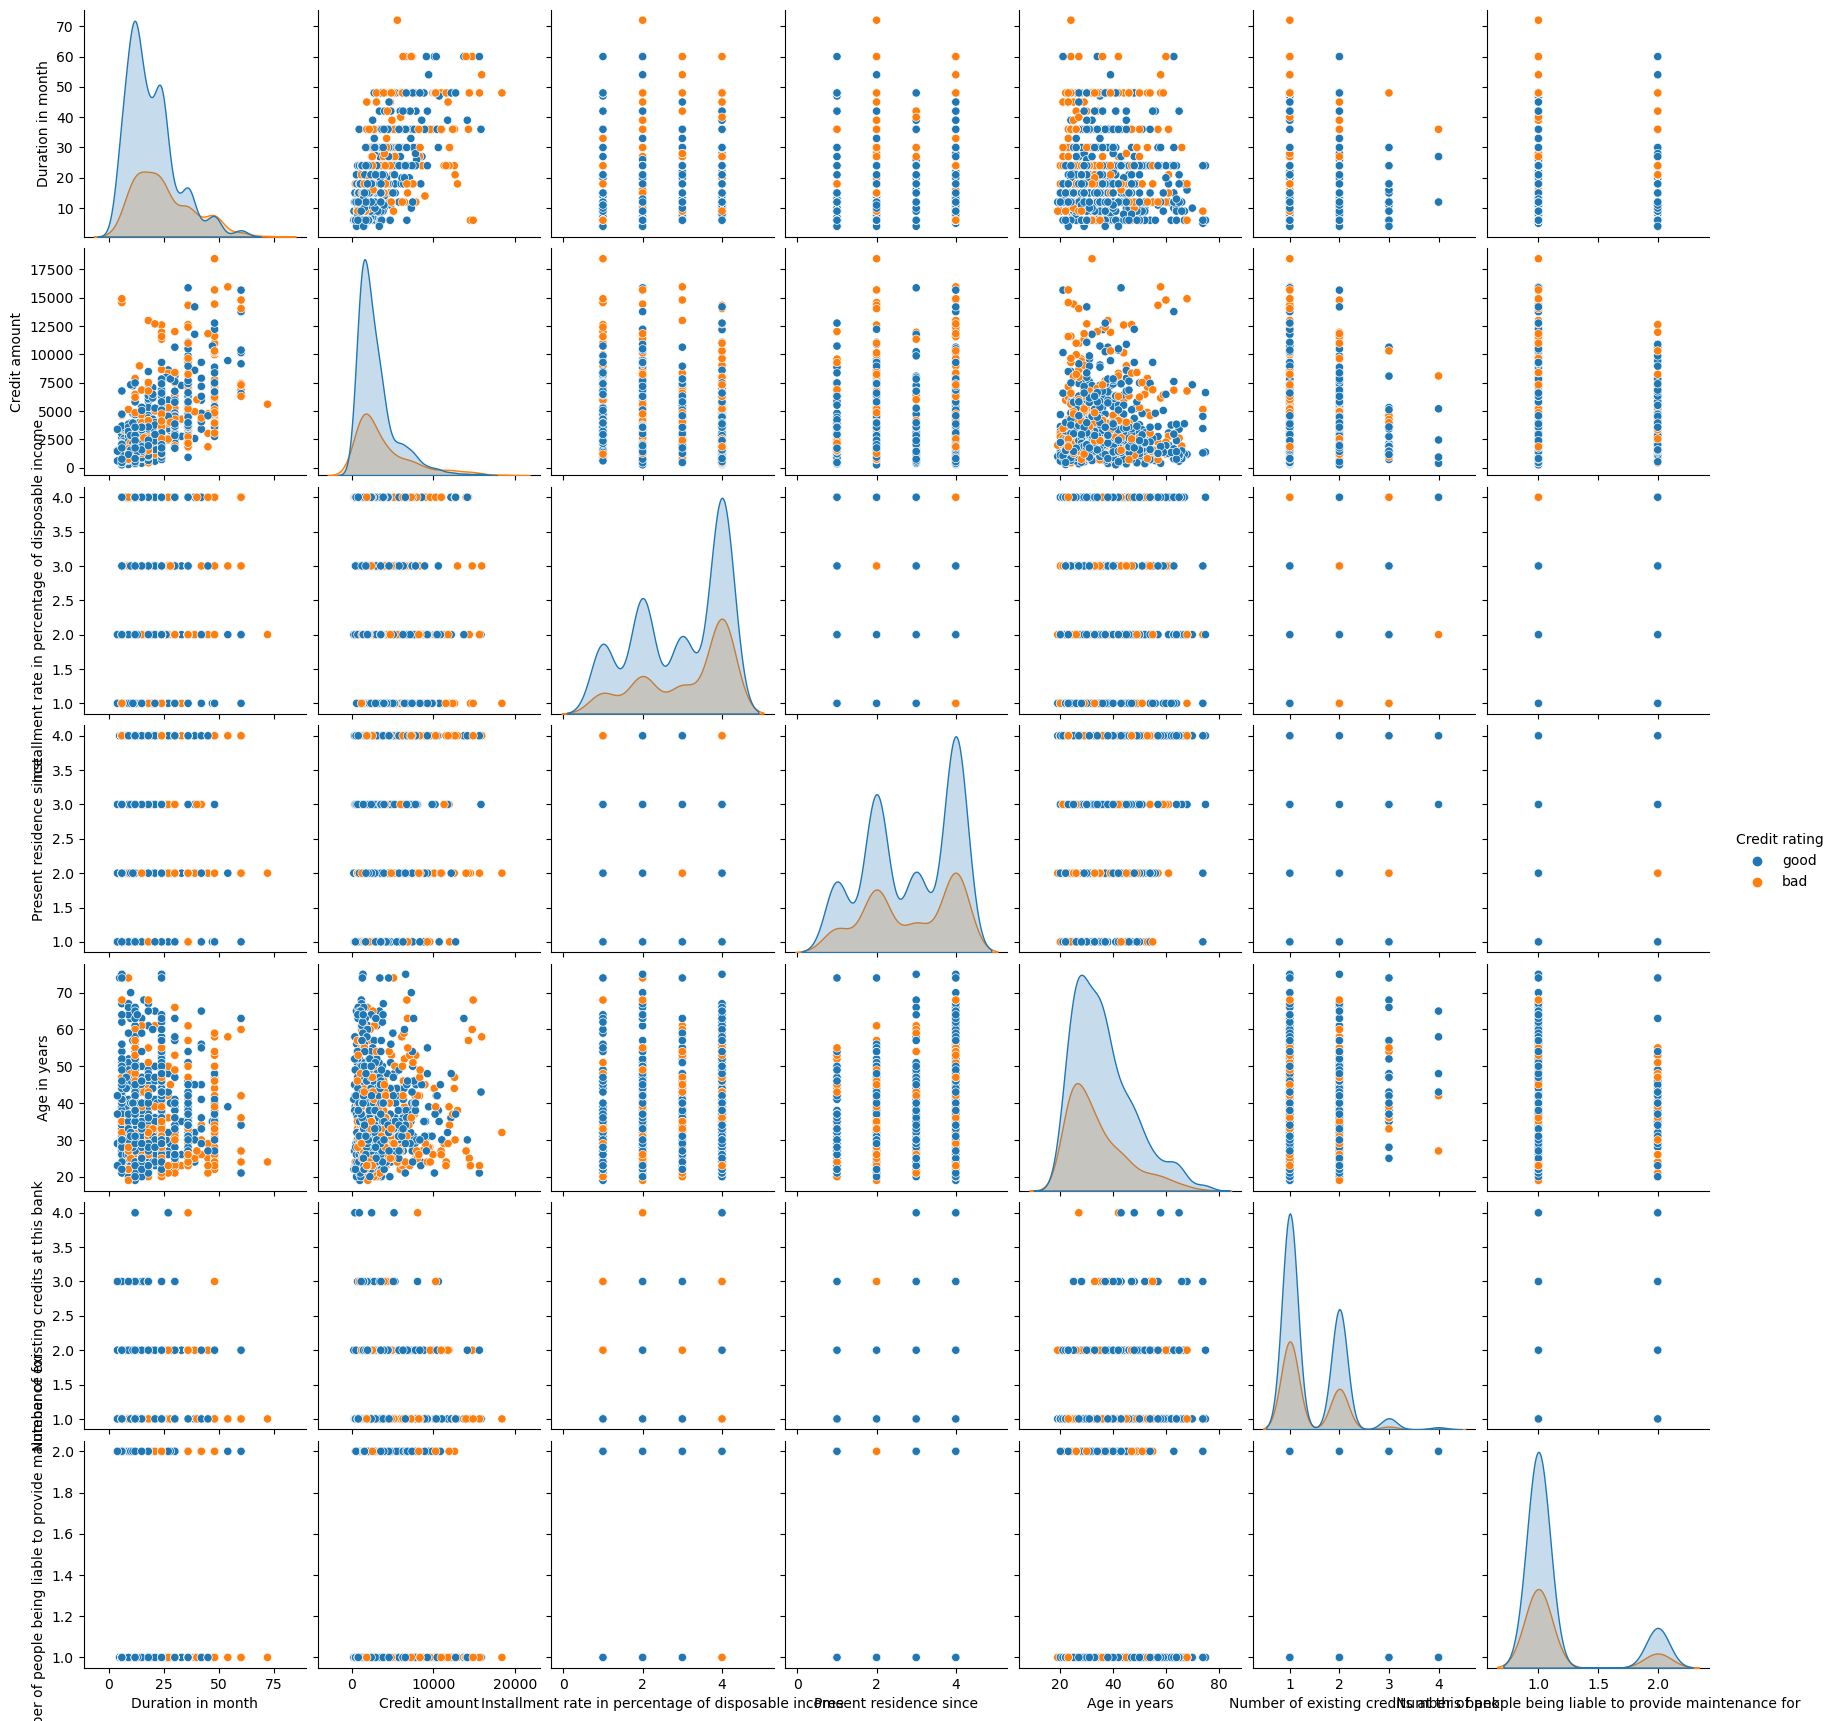

In [193]:
# Pairplotting the numerical columns
# scatter_matrix(data_train, c=y_train, figsize=(30,30), marker='o',
#                hist_kwds={'bins': 15}, s=30);

sns.pairplot(data_values, markers='o', hue='Credit rating');

In [194]:
# Correlation between features and target value
data_values_dummies.corr()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
Status of existing checking account,1.000000,-0.084226,-0.131100,-0.079508,-0.063432,0.038927,-0.074184,-0.031215,-0.028672,-0.101713,...,0.019656,0.057936,-0.023378,-0.121346,0.042741,-0.021350,-0.027212,-0.049715,-0.017726,-0.317294
Duration in month,-0.084226,1.000000,0.142631,0.105305,0.624984,-0.009619,-0.031987,0.074749,-0.116029,0.006711,...,0.245655,-0.036136,0.076992,0.011950,-0.011284,0.015715,-0.023834,-0.164718,-0.138196,0.214927
Credit history,-0.131100,0.142631,1.000000,0.143938,0.113776,0.067464,0.078664,-0.024740,-0.005519,-0.008955,...,0.071606,-0.070046,0.239431,0.077417,-0.207960,0.037662,0.051849,0.018283,-0.041784,0.232157
Purpose,-0.079508,0.105305,0.143938,1.000000,0.203234,0.031698,0.026617,-0.092747,-0.035918,-0.020423,...,0.027161,0.066020,0.049489,0.028464,0.071995,0.155968,0.077245,-0.116031,0.035655,0.051311
Credit amount,-0.063432,0.624984,0.113776,0.203234,1.000000,-0.060195,0.005653,-0.271316,-0.159434,0.037921,...,0.224550,0.032716,0.045815,0.056119,0.020795,0.182750,0.017142,-0.276995,-0.050050,0.154739
Savings account/bonds,0.038927,-0.009619,0.067464,0.031698,-0.060195,1.000000,0.014129,-0.010502,0.058271,-0.006327,...,0.032131,-0.068435,0.002696,0.018343,-0.003050,-0.045329,-0.015059,0.047016,0.006803,0.014445
Present employment since,-0.074184,-0.031987,0.078664,0.026617,0.005653,0.014129,1.000000,-0.087305,0.170340,0.009477,...,-0.041518,-0.270485,0.004556,0.059077,-0.103222,0.108195,-0.073919,0.046683,0.031612,0.099046
Installment rate in percentage of disposable income,-0.031215,0.074749,-0.024740,-0.092747,-0.271316,-0.010502,-0.087305,1.000000,-0.081121,-0.014835,...,0.039353,0.058266,0.034750,-0.073955,0.021669,-0.037933,-0.071207,-0.014413,-0.090024,0.072404
Personal status and sex,-0.028672,-0.116029,-0.005519,-0.035918,-0.159434,0.058271,0.170340,-0.081121,1.000000,-0.011880,...,-0.099575,-0.186563,-0.065461,0.083146,-0.089640,-0.041234,-0.238327,0.057207,0.009204,0.042643
Other debtors / guarantors,-0.101713,0.006711,-0.008955,-0.020423,0.037921,-0.006327,0.009477,-0.014835,-0.011880,1.000000,...,-0.101378,-0.028294,-0.000955,0.036219,-0.017662,-0.003580,-0.010990,0.050996,0.107639,0.028441


In [195]:
# top 5 (positive and negative) correlations between target variable and features
# Prerequisite: categorical features like "status of existing checking account", "credit history", ... are equally interpretable between categories
# example: '... < 0 DM': 0, '0 <= ... < 200 DM': 1, 'no checking account': 2, '... >= 200 DM / salary assignments for at least 1 year': 3
#          difference between 0 (< 0 DM) and 1 (0 <= x < 200 DM) are equally valued as distance (not easy to interpret as they are not numerical value)

top10_correlation_feat = pd.DataFrame(data_values_dummies.corr().iloc[:-1, -1].abs().sort_values(ascending = False).head(5))
top10_correlation_feat

# Objectives to check in the model:
# - Does the status of the checking account influence if the credit gets a good or bad credit rating?
# - Does the credit history determine if the credit gets a good or bad credit rating?
# - Does the duration of the credit determine if the credit gets a good or bad credit rating?
# - Does the credit amount determines if the credit gets a good or bad credit rating?
# - Does the fact that the borrower is a house owner determine if the credit gets a good or bad credit rating?

,Credit rating
Status of existing checking account,0.317294
Credit history,0.232157
Duration in month,0.214927
Credit amount,0.154739
Housing,0.123815


In [196]:
# Noiseiness
data_values_dummies.describe()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.246000,20.903000,1.022000,2.414000,3271.258000,1.285000,1.561000,2.973000,0.686000,0.134000,...,1.536000,35.546000,0.233000,0.466000,1.407000,0.562000,1.155000,0.596000,0.037000,0.300000
std,0.927547,12.058814,0.991211,2.033898,2822.736876,1.133605,1.382096,1.118715,0.931811,0.445244,...,1.215805,11.375469,0.522479,0.779392,0.577654,0.821481,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,1365.500000,1.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,1.000000,2.000000,2319.500000,1.000000,1.000000,3.000000,0.000000,0.000000,...,1.000000,33.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,24.000000,1.000000,4.000000,3972.250000,1.000000,2.000000,4.000000,1.000000,0.000000,...,3.000000,42.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.000000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.000000,2.000000,...,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


# Analysis of Features
**Status of existing checking account**<br>
* categorical / nominal<br>
* 0 % missing<br>
* Noisiness and distribution are hard to interpret as it is a categorical value<br>
* Seems usefull, as it has the highest correlation with the target variable of all features<br>
* first and secound category are equally represented in the data, class 3 is stronger represented than class 1 + 2 and class 4 is strongly underrepresented than class 1 + 2
    * interpretation: the accounts of 400 people weren't checked, around 270 people each have 0 or less / between 0 and 200 and 50 people have more than 200
* we can't find evidence that the variables are normal, uniform or gamma distributed

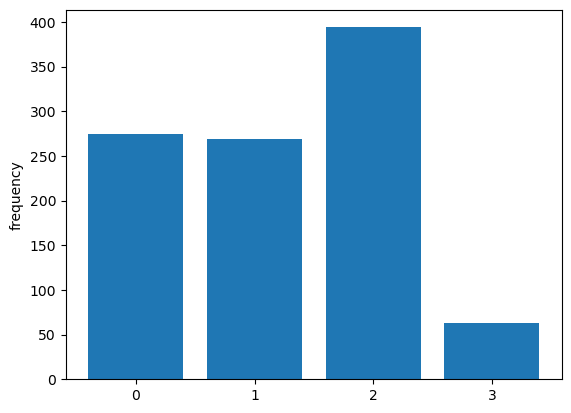

{'... < 0 DM': 0,
 '0 <= ... < 200 DM': 1,
 'no checking account': 2,
 '... >= 200 DM / salary assignments for at least 1 year': 3}

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Explore Feature "Status of existing checking account"

# Plot against the target variable to see relationship
fig, ax = plt.subplots()
ax.bar(range(len(data_values_dummies.iloc[:, 0].value_counts(sort = False).values)), data_values_dummies.iloc[:, 0].value_counts(sort = False).values)
plt.xticks(range(len(data_values_dummies.iloc[:, 0].value_counts(sort = False).values)))
plt.ylabel('frequency')
plt.show()
all_dict[0]

In [184]:
import scipy.stats as stats
import numpy as np

x_axis = np.unique(data_values_dummies.iloc[:, 0])
observed_values = data_values_dummies.iloc[:, 0].value_counts(sort = False).values

def check_zero(array):
    n = 0
    for i in range(len(array)):
        if array[i] == 0:
            array[i] = 0.01
            n += 0.01
        else:
            if n > 0 and array[i] > n:
                array[i] -= n
                n = 0
    return array    
            
def check_normal(x_values, observed_values, significance_level = 0.05):
    '''
    This function calculates the chi squared test statistic for the normal distribution for a given significance level.
    --- Input ---
    x_values: the categories
    obersved_values: the data grouped in the categories
    significance_level: the alpha for the chi squared critical value calculation

    --- Output ---
    No output, the values are printed to the console
    '''
    # calculate parameters for normal distribution
    N = sum(observed_values)
    mean_obs = sum(x_values * observed_values) / sum(observed_values)
    var_obs = sum(((x_values - mean_obs)**2) * observed_values) / sum(observed_values)
    # calculate probability funciton of normal distribution for given x
    expected_values = [stats.norm.cdf(x_values[i], loc = mean_obs, scale = np.sqrt(var_obs)) for i in range(len(x_values))]
    expected_values_diff = np.diff(expected_values)
    for i in range(1, len(expected_values)):
        if i != len(expected_values) - 1:
            expected_values[i] = expected_values_diff[i - 1]
        else: 
            expected_values[-1] = 1 - sum(expected_values[:-1])
    expected_values = np.array(expected_values) * N
    # Test observed and expected values
    chisquare_data = stats.chisquare(observed_values, expected_values)
    crit = stats.chi2.ppf(q = 1 - significance_level, df = len(x_values)-1)
    # print
    if (chisquare_data[0] <= crit):
        print('The data is normally distributed\nchi squared:' , chisquare_data[0], '\ncritical value is:' , crit)
    else:
        print('The data is NOT normally distributed\nchi squared:' , chisquare_data[0], '\ncritical value is:' , crit)

def check_uniform(x_values, observed_values, significance_level = 0.05):
    '''
    This function calculates the chi squared test statistic for the uniform distribution for a given significance level.
    --- Input ---
    x_values: the categories
    obersved_values: the data grouped in the categories
    significance_level: the alpha for the chi squared critical value calculation

    --- Output ---
    No output, the values are printed to the console
    '''
    # calculate parameters for normal distribution
    N = sum(observed_values)
    # calculate probability funciton of normal distribution for given x
    expected_values = [sum(observed_values) / len(observed_values) for i in range(len(observed_values))]
    # Test observed and expected values
    chisquare_data = stats.chisquare(observed_values, expected_values)
    crit = stats.chi2.ppf(q = 1 - significance_level, df = len(x_values)-1)
    # print
    if (chisquare_data[0] <= crit):
        print('The data is uniformally distributed\nchi squared:' , chisquare_data[0], '\ncritical value is:' , crit)
    else:
        print('The data is NOT uniformally distributed\nchi squared:' , chisquare_data[0], '\ncritical value is:' , crit)

def check_gamma(x_values, observed_values, significance_level = 0.05):
    '''
    This function calculates the chi squared test statistic for the gamma distribution for a given significance level.
    --- Input ---
    x_values: the categories
    obersved_values: the data grouped in the categories
    significance_level: the alpha for the chi squared critical value calculation

    --- Output ---
    No output, the values are printed to the console
    '''
    # calculate parameters for normal distribution
    N = sum(observed_values)
    mean_obs = sum(x_values * observed_values) / sum(observed_values)
    var_obs = sum(((x_values - mean_obs)**2) * observed_values) / sum(observed_values)
    # calculate probability funciton of normal distribution for given x
    a = (mean_obs / np.sqrt(var_obs))**2
    expected_values = [stats.gamma.cdf(x_values[i], a, loc = mean_obs, scale = np.sqrt(var_obs)) for i in range(len(x_values))]
    expected_values_diff = np.diff(expected_values)
    for i in range(1, len(expected_values)):
        if i != len(expected_values) - 1:
            expected_values[i] = expected_values_diff[i - 1]
        else: 
            expected_values[-1] = 1 - sum(expected_values[:-1])
    expected_values = check_zero(expected_values)
    expected_values = np.array(expected_values) * N
    # Test observed and expected values
    chisquare_data = stats.chisquare(observed_values, expected_values)
    crit = stats.chi2.ppf(q = 1 - significance_level, df = len(x_values)-1)
    # print
    if (chisquare_data[0] <= crit):
        print('The data is gamma distributed\nchi squared:' , chisquare_data[0], '\ncritical value is:' , crit)
    else:
        print('The data is NOT gamma distributed\nchi squared:' , chisquare_data[0], '\ncritical value is:' , crit)

check_normal(x_axis, observed_values)
check_uniform(x_axis, observed_values)
check_gamma(x_axis, observed_values)


The data is NOT normally distributed
chi squared: 486.1229131682124 
critical value is: 7.814727903251179
The data is NOT uniformally distributed
chi squared: 226.568 
critical value is: 7.814727903251179
The data is NOT gamma distributed
chi squared: 14432.773442033002 
critical value is: 7.814727903251179


**Duration in month**<br>
* Numerical / discrete <br>
* 0 % missing<br>
* Seems usefull, as it has the third highest correlation with the target variable of all features<br>
* we can't find evidence that the variables are normal, uniform or gamma distributed


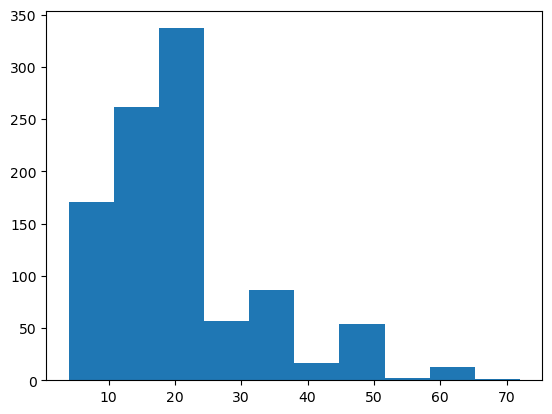

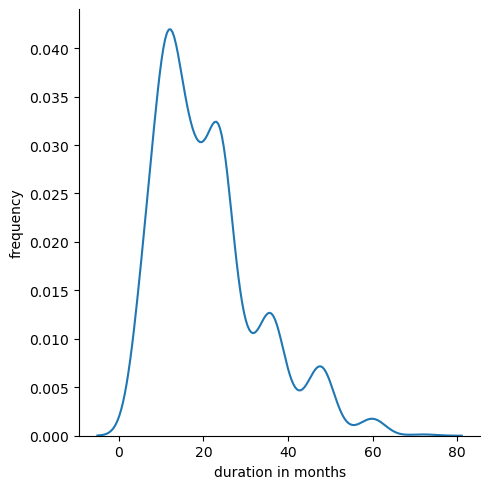

In [198]:
import scipy.stats
# Explore Feature "Duration in month"

# Plot against the target variable to see relationship
fig, ax = plt.subplots()
ax.hist(data_values_dummies.iloc[:, 1])
sns.displot(data_values_dummies.iloc[:, 1], kind = 'kde')
plt.xlabel('duration in months')
plt.ylabel('frequency')
plt.show()

In [185]:
x_axis = np.unique(data_values_dummies.iloc[:, 1])
observed_values = data_values_dummies.iloc[:, 1].value_counts(sort = False).values

check_normal(x_axis, observed_values)
check_uniform(x_axis, observed_values)
check_gamma(x_axis, observed_values)



The data is NOT normally distributed
chi squared: 2461420.089986649 
critical value is: 46.19425952027847
The data is NOT uniformally distributed
chi squared: 2435.168 
critical value is: 46.19425952027847
The data is NOT gamma distributed
chi squared: 8648.307811910694 
critical value is: 46.19425952027847


**Credit history**<br>
* categorical / nominal <br>
* 0 % missing<br>
* Seems usefull, as it has the secound highest correlation with the target variable of all features<br>
* we can't find evidence that the variables are normal, uniform or gamma distributed

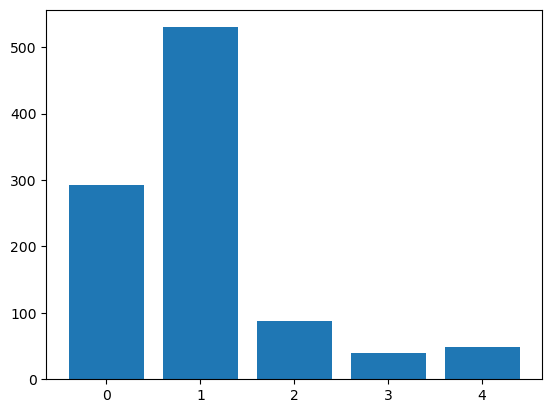

{'critical account/ other credits existing (not at this bank)': 0,
 'existing credits paid back duly till now': 1,
 'delay in paying off in the past': 2,
 'no credits taken/ all credits paid back duly': 3,
 'all credits at this bank paid back duly': 4}

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Explore Feature "Status of existing checking account"

# Plot against the target variable to see relationship
fig, ax = plt.subplots()
ax.bar(range(len(data_values_dummies.iloc[:, 2].value_counts(sort = False).values)), data_values_dummies.iloc[:, 2].value_counts(sort = False).values)
plt.show()
all_dict[1]

In [187]:
x_axis = np.unique(data_values_dummies.iloc[:, 2])
observed_values = data_values_dummies.iloc[:, 2].value_counts(sort = False).values

check_normal(x_axis, observed_values)
check_uniform(x_axis, observed_values)
check_gamma(x_axis, observed_values)

The data is NOT normally distributed
chi squared: 532.6995624967709 
critical value is: 9.487729036781154
The data is NOT uniformally distributed
chi squared: 892.47 
critical value is: 9.487729036781154
The data is NOT gamma distributed
chi squared: 35710.63229214245 
critical value is: 9.487729036781154
[0 1 2 3 4]


**Credit Amount**<br>
* numerical / continous <br>
* 0 % missing<br>
* Seems usefull, as it has the fourth highest correlation with the target variable of all features<br>
* we can't find evidence that the variables are normal, uniform or gamma distributed

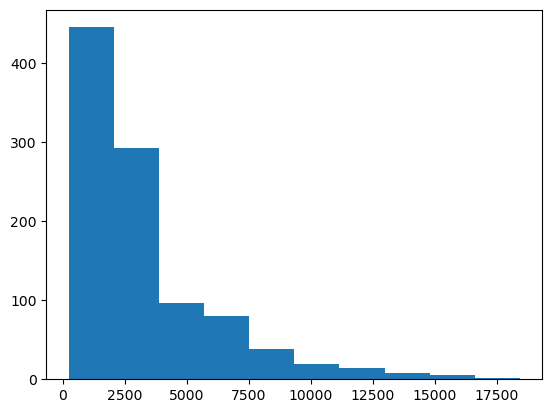

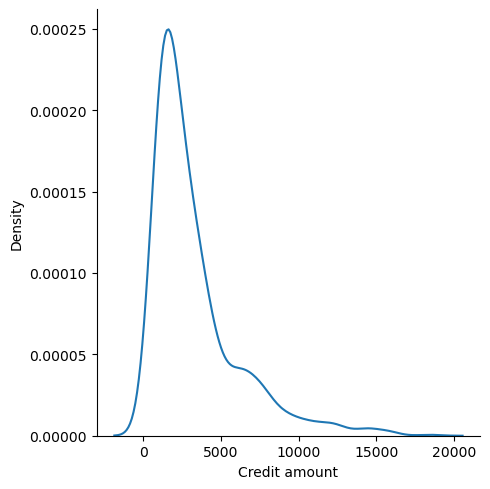

In [216]:
fig, ax = plt.subplots()
ax.hist(data_values_dummies.iloc[:, 4])
sns.displot(data_values_dummies.iloc[:, 4], kind = 'kde')
plt.show()

**Housing**<br>
* categorical / nominal <br>
* 0 % missing<br>
* Seems usefull, as it has the fifth highest correlation with the target variable of all features<br>
* we can't find evidence that the variables are normal, uniform or gamma distributed

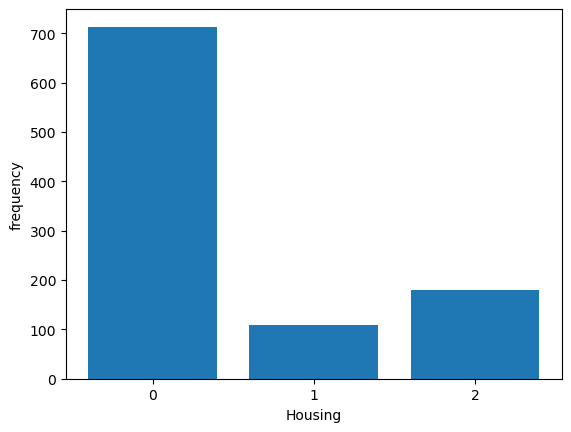

{'own': 0, 'for free': 1, 'rent': 2}

In [215]:
fig, ax = plt.subplots()
ax.bar(range(len(data_values_dummies.iloc[:, 14].value_counts(sort = False).values)), data_values_dummies.iloc[:, 14].value_counts(sort = False).values)
plt.ylabel('frequency')
plt.xlabel('Housing')
plt.xticks(range(len(data_values_dummies.iloc[:, 14].value_counts(sort = False).values)))
plt.show()
all_dict[9]

In [202]:
x_axis = np.unique(data_values_dummies.iloc[:, 14])
observed_values = data_values_dummies.iloc[:, 14].value_counts(sort = False).values

check_normal(x_axis, observed_values)
check_uniform(x_axis, observed_values)
check_gamma(x_axis, observed_values)

The data is NOT normally distributed
chi squared: 1003.9491596080223 
critical value is: 5.991464547107979
The data is NOT uniformally distributed
chi squared: 656.222 
critical value is: 5.991464547107979
The data is NOT gamma distributed
chi squared: 50044.00710349668 
critical value is: 5.991464547107979
